In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

application_train = pd.read_csv("app_train_i2.csv")
credit_card_balance = pd.read_csv("credit_card_balance_i2.csv")
installments_payments = pd.read_csv("installments_payments_i2.csv")
previous_application = pd.read_csv("previous_app_i2.csv")

print("application_train -  rows:",application_train.shape[0]," columns:", application_train.shape[1])
print("credit_card_balance -  rows:",credit_card_balance.shape[0]," columns:", credit_card_balance.shape[1])
print("installments_payments -  rows:",installments_payments.shape[0]," columns:", installments_payments.shape[1])
print("previous_application -  rows:",previous_application.shape[0]," columns:", previous_application.shape[1])


application_train -  rows: 238575  columns: 40
credit_card_balance -  rows: 3840312  columns: 6
installments_payments -  rows: 1670214  columns: 12
previous_application -  rows: 1670214  columns: 12


### 5) 신용평가 점수

In [2]:
# 5번 보라색 칼럼 데이터프레임
df2= application_train.iloc[:, [1,2]]
df1 = previous_application.iloc[:, [2,3,4,5,6]]
previous_application_i = pd.merge(df1, df2, on = 'SK_ID_CURR')
previous_application_i

,SK_ID_CURR,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_CASH_LOAN_PURPOSE,NAME_PAYMENT_TYPE,TARGET
0,271877,SATURDAY,15,XAP,Cash through the bank,0
1,271877,SATURDAY,18,XAP,Cash through the bank,0
2,271877,SUNDAY,14,XAP,Cash through the bank,0
3,108129,THURSDAY,11,XNA,XNA,0
4,108129,WEDNESDAY,9,XNA,XNA,0
5,108129,THURSDAY,11,XAP,Cash through the bank,0
6,108129,WEDNESDAY,9,XAP,Cash through the bank,0
7,108129,TUESDAY,13,XAP,XNA,0
8,108129,SUNDAY,10,XAP,Cash through the bank,0
9,122040,TUESDAY,11,XNA,Cash through the bank,0


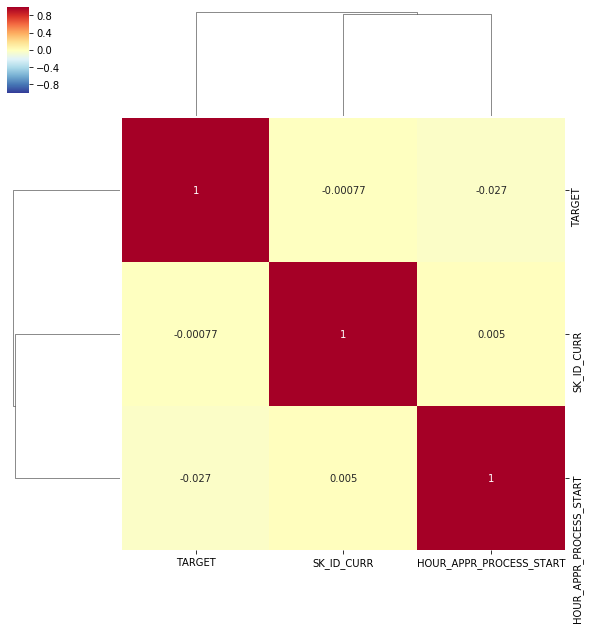

In [27]:
ip=previous_application_i.corr()
ip

sns.clustermap(ip, annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

In [3]:
def plot_stats_p(feature,label_rotation=False,horizontal_layout=True):
    temp = previous_application_i[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = previous_application_i[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10)) 
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,16))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

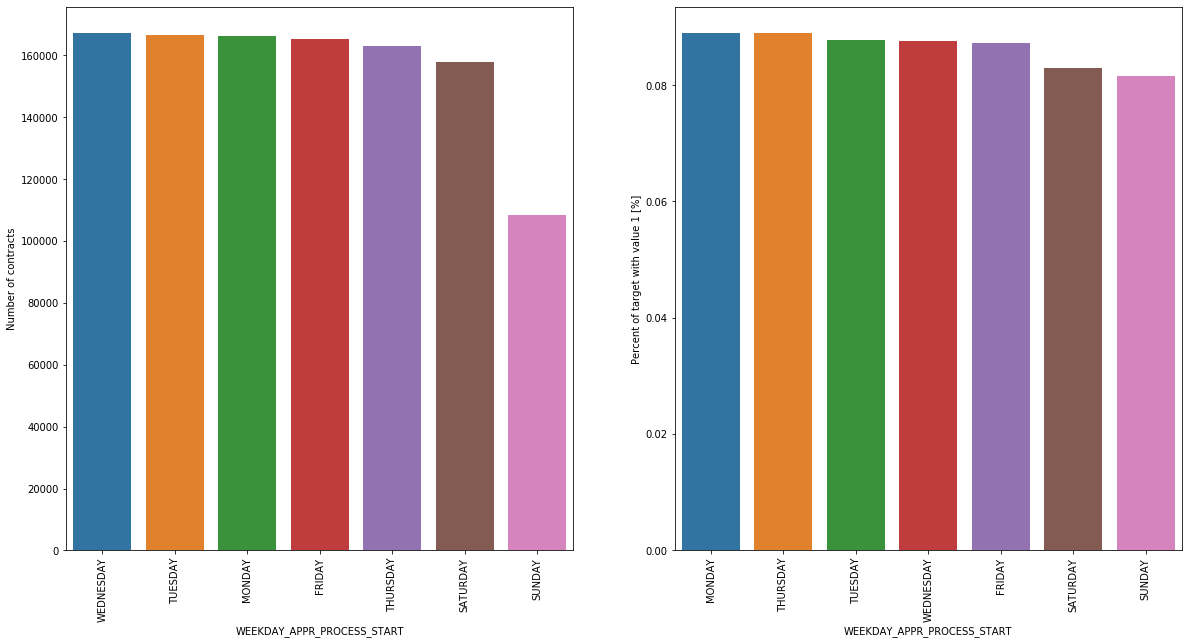

In [13]:
plot_stats_p('WEEKDAY_APPR_PROCESS_START', True)

# 1. 신청 시각

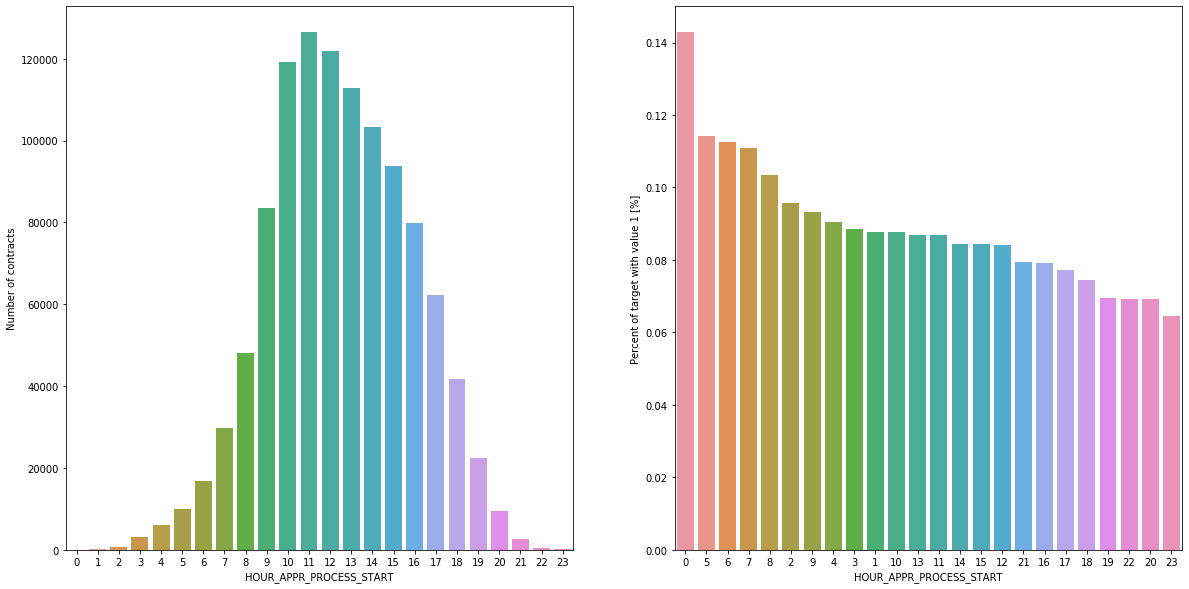

In [14]:
# 신청서 작성 시각?
plot_stats_p('HOUR_APPR_PROCESS_START')

# 2. 신청 목적-이유를 말하기 거부한 경우

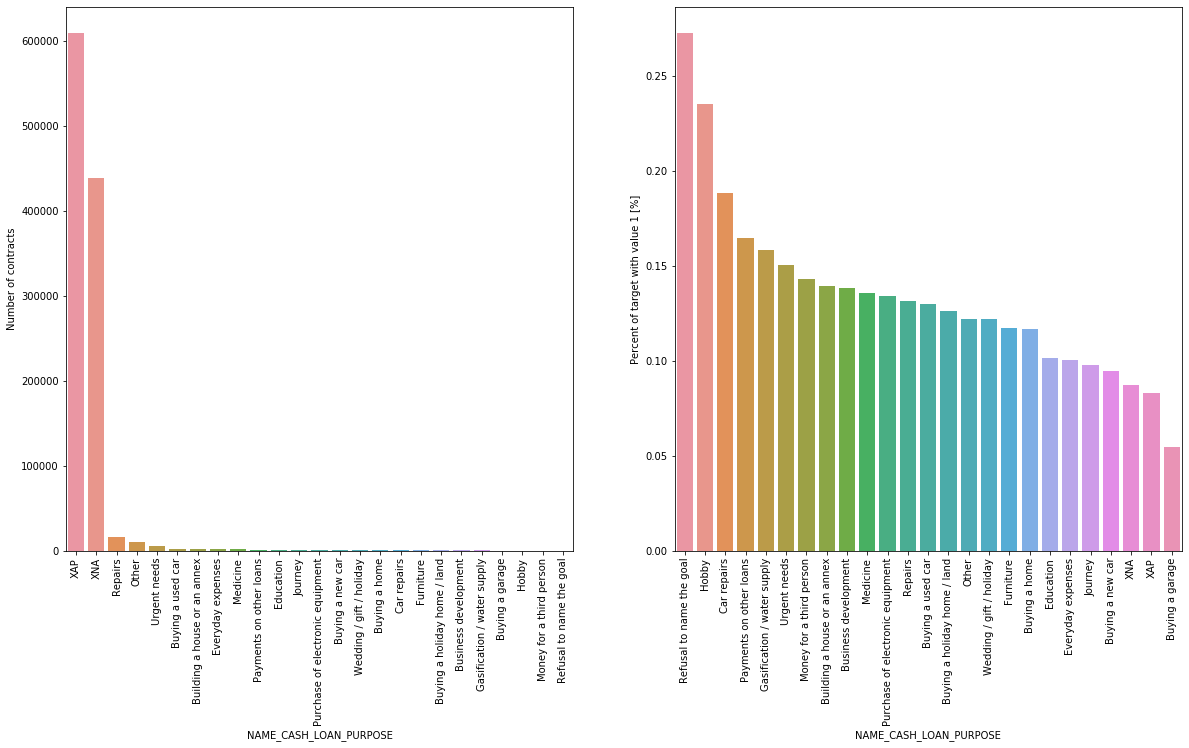

In [4]:
#  신청 목적
plot_stats_p('NAME_CASH_LOAN_PURPOSE', True)

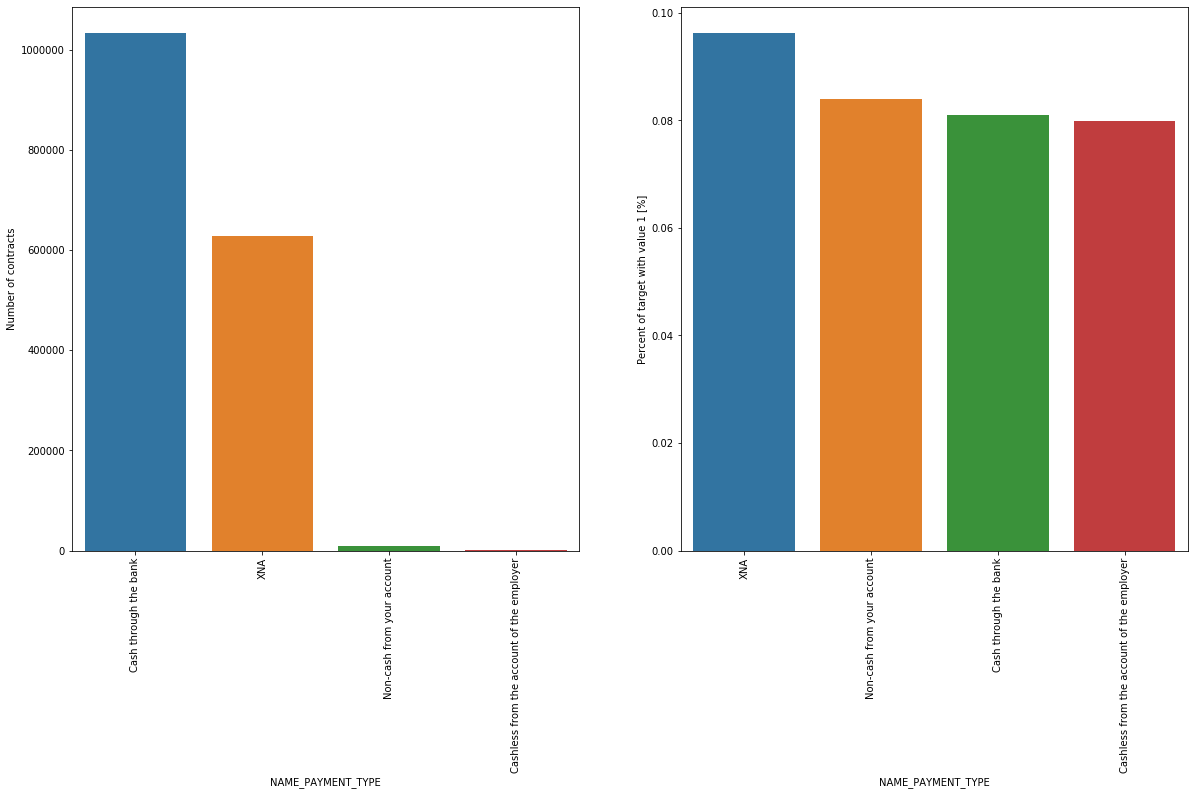

In [8]:
plot_stats_p('NAME_PAYMENT_TYPE', True)

### 6) 대출 관련 데이터 

In [6]:
#6번 칼럼 데이터프레임 
df2= application_train.loc[:, ['SK_ID_CURR','TARGET','AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']]
df1 = previous_application.loc[:, ['SK_ID_CURR', 'NAME_PORTFOLIO','NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA']] 

column_six= pd.merge(df1, df2, on = 'SK_ID_CURR')
column_six

,SK_ID_CURR,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,TARGET,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START
0,271877,POS,XNA,Country-wide,35,0,477000.0,TUESDAY,17
1,271877,POS,XNA,Regional / Local,55,0,477000.0,TUESDAY,17
2,271877,POS,XNA,Stone,196,0,477000.0,TUESDAY,17
3,108129,Cash,x-sell,Contact center,-1,0,135000.0,SUNDAY,10
4,108129,Cash,x-sell,AP+ (Cash loan),6,0,135000.0,SUNDAY,10
5,108129,POS,XNA,Stone,110,0,135000.0,SUNDAY,10
6,108129,POS,XNA,Stone,108,0,135000.0,SUNDAY,10
7,108129,Cards,x-sell,Contact center,-1,0,135000.0,SUNDAY,10
8,108129,POS,XNA,Stone,108,0,135000.0,SUNDAY,10
9,122040,Cash,x-sell,Credit and cash offices,-1,0,225000.0,TUESDAY,9


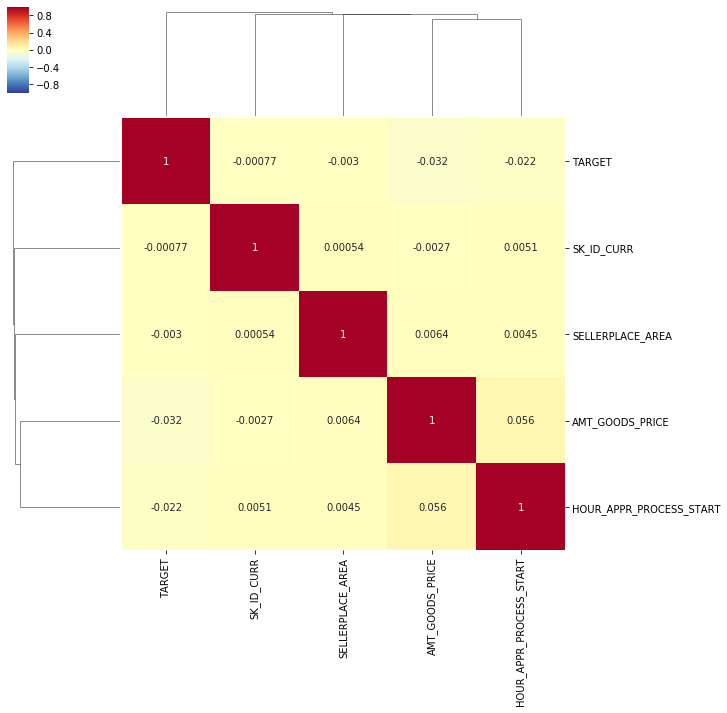

In [15]:
ip= column_six.corr()
ip

sns.clustermap(ip, annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

In [7]:
def plot_stats_q(feature,label_rotation=False,horizontal_layout=True):
    temp = column_six[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = column_six[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6)) 
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

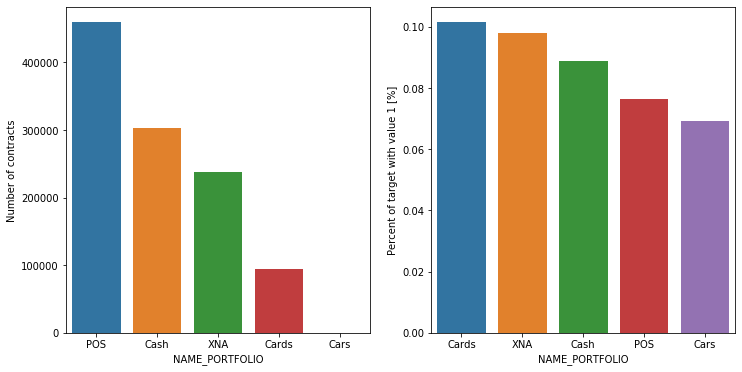

In [21]:
plot_stats_q('NAME_PORTFOLIO')

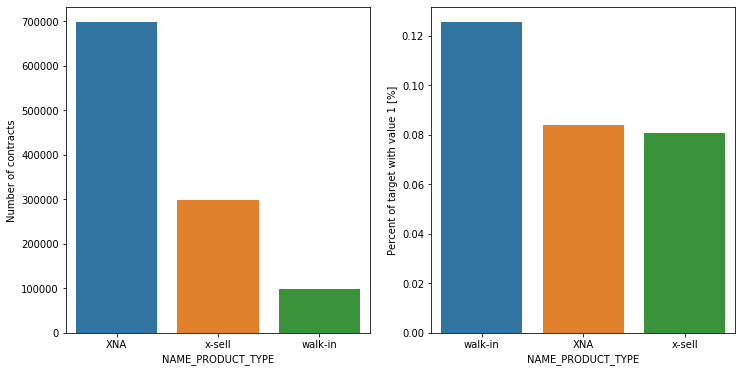

In [22]:
plot_stats_q('NAME_PRODUCT_TYPE')

# 3. 대출 수단 - 현금 대출이 가장 연체율 높음

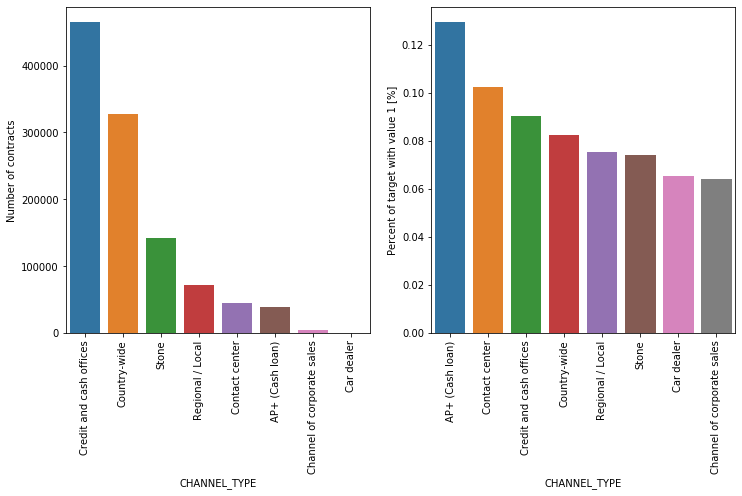

In [24]:
plot_stats_q('CHANNEL_TYPE',True)

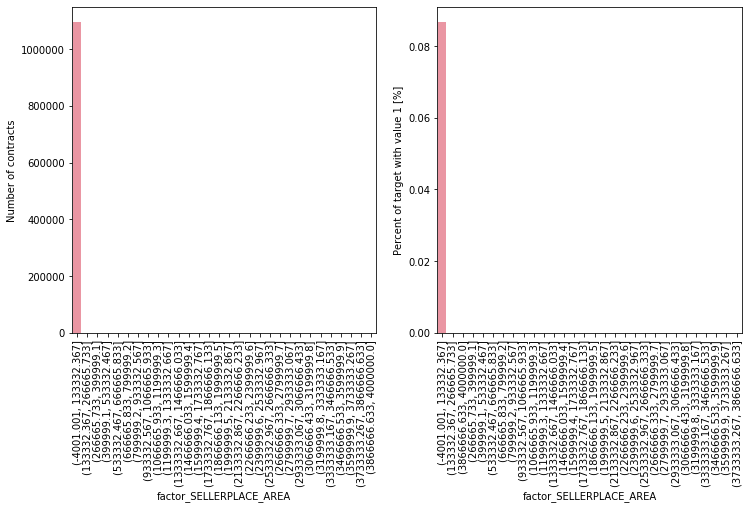

In [22]:
#구간 별로 자르기
factor_SELLERPLACE_AREA = pd.cut(column_six.SELLERPLACE_AREA,30)
factor_SELLERPLACE_AREA
column_six['factor_SELLERPLACE_AREA'] = factor_SELLERPLACE_AREA
plot_stats_q('factor_SELLERPLACE_AREA', True)

# 4. 가격대
# -는 6,7번째로 높은 사람들이 연체를 가장 많이 하나, 소숫점 차이라서 유의미한지는 모르겠다.

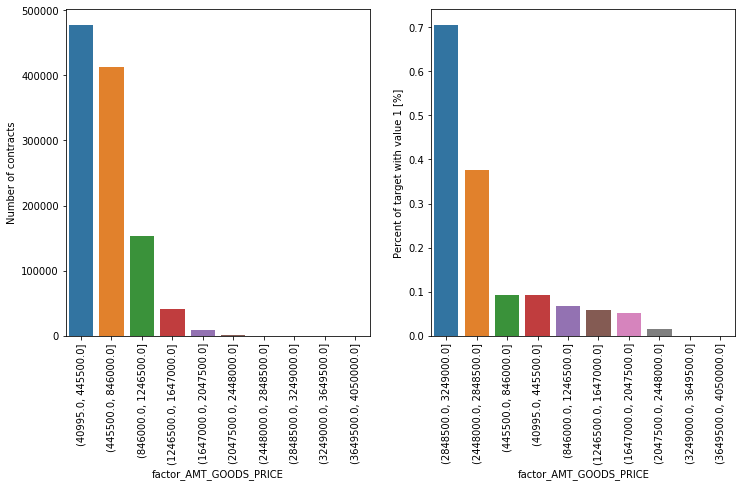

In [26]:
factor_AMT_GOODS_PRICE = pd.cut(column_six.AMT_GOODS_PRICE,10)
column_six['factor_AMT_GOODS_PRICE'] = factor_AMT_GOODS_PRICE
plot_stats_q('factor_AMT_GOODS_PRICE', True)

# Categories (10, interval[float64]): 
# [(40995.0, 445500.0] 
# < (445500.0, 846000.0] 
# < (846000.0, 1246500.0] 
# < (1246500.0, 1647000.0] ... (2448000.0, 2848500.0] 
# < (2848500.0, 3249000.0] 
# < (3249000.0, 3649500.0] 
# < (3649500.0, 4050000.0]]

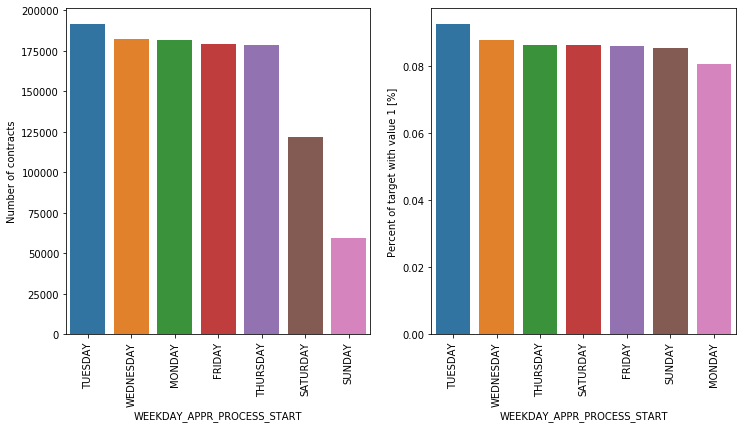

In [11]:
plot_stats_q('WEEKDAY_APPR_PROCESS_START', True)

In [ ]:
# 4. 대출 시작 시각 - 0시 전후로 가장 연체율이 높나, 큰 차이는 보이지 않음 

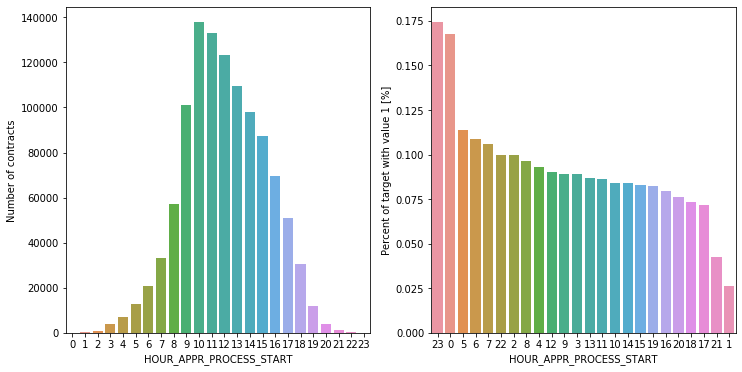

In [12]:
plot_stats_q('HOUR_APPR_PROCESS_START')

# 히스토그램, x 값이 숫자가 아닐 때

In [13]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

NameError: name 'app_train' is not defined

<Figure size 720x576 with 0 Axes>

In [14]:
sns.violinplot(x = 'days', y = 'total', data = previous_application )

ValueError: Could not interpret input 'days'

In [66]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6)) 
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

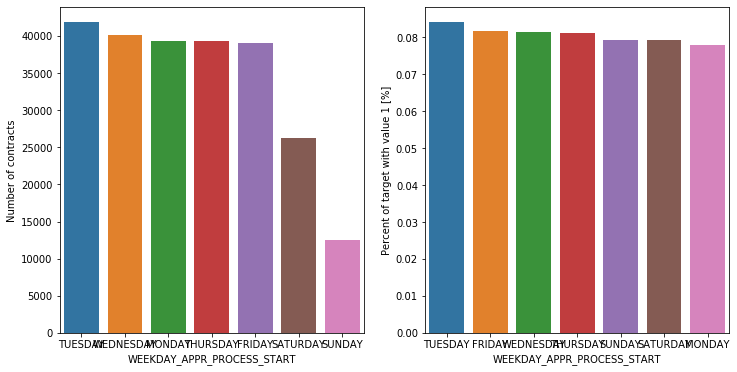

In [77]:
plot_stats('WEEKDAY_APPR_PROCESS_START')

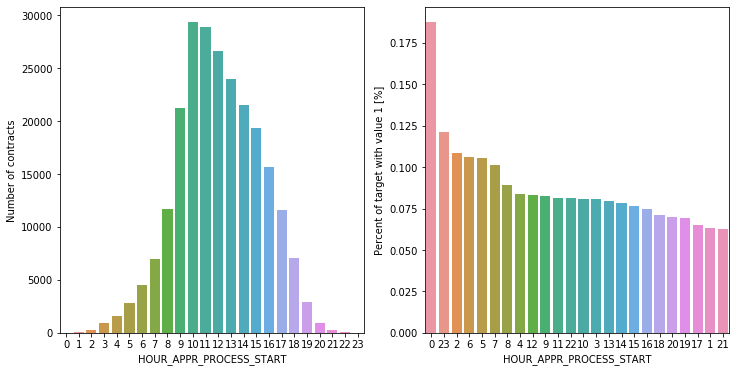

In [78]:
plot_stats('HOUR_APPR_PROCESS_START')

In [28]:
def plot_distribution(var):
    
    i = 0
    t1 = application_train.loc[application_train['TARGET'] != 0]
    t0 = application_train.loc[application_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,2,figsize=(12,12))

    for feature in var:
        i += 1
        plt.subplot(2,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

In [29]:
# 1개 속성으로 분산분포 살펴보기
def plot_distribution(feature, color):
    plt.figure(figsize=(10, 6))
    plt.title('Distribution of %s' % feature)
    sns.distplot(application_train[feature].dropna(), color = color, kde = True, bins =100)
    plt.show()


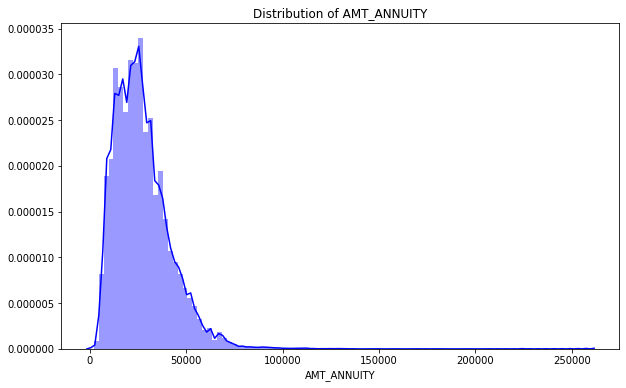

In [30]:
plot_distribution('AMT_ANNUITY', 'blue')

In [ ]:
# 2개 이상의 속성으로 분산분포 살펴보기
def plot_distribution_comp(var, nrow=2):
    
    i = 0
    t1 = application_train.loc[application_train['TARGET'] != 0]
    t0 = application_train.loc[application_train['TARGET'] ==0]
    
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow, 2, figsize = (12, 6*nrow))
    
    for feature in var:
        i +=1
        plt.subplot(nrow, 2, i)
        sns.kdeplot(t1[feature], bw =0.5, label = 'TARGET =1')
        

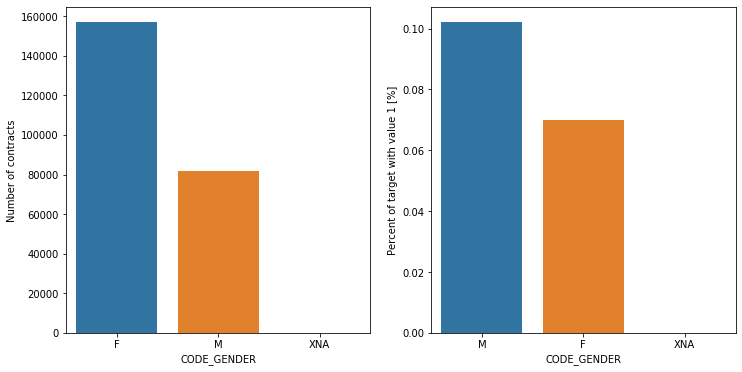

In [6]:
plot_stats('CODE_GENDER')

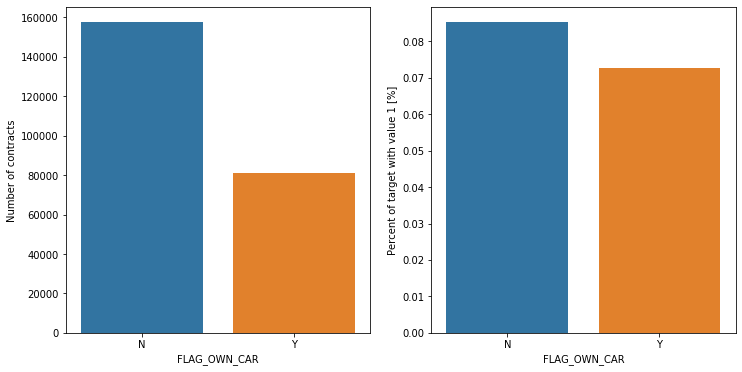

In [7]:
plot_stats('FLAG_OWN_CAR')

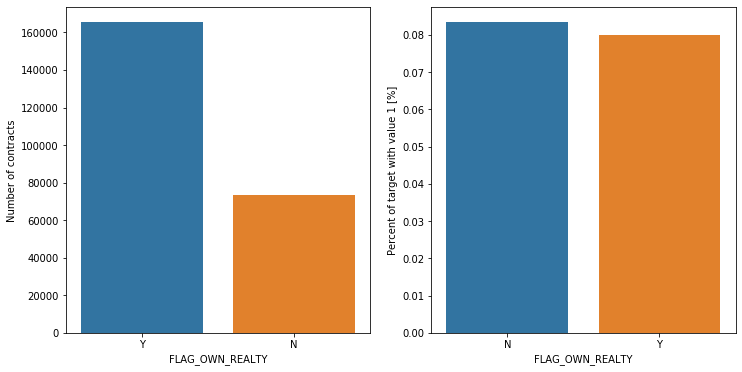

In [8]:
plot_stats('FLAG_OWN_REALTY')

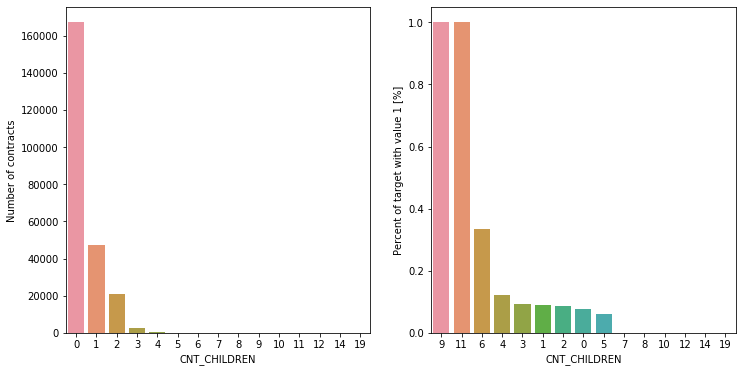

In [10]:
plot_stats('CNT_CHILDREN')
# 아이 수가 9명 이상부터는 비상환율이 급하게 높아진다. 

In [16]:
# Plots the disribution of a variable colored by value of the target
def kde_target(var_name, df):
    
    # Calculate the correlation coefficient between the new variable and the target
    corr = df['TARGET'].corr(df[var_name])
    
    # Calculate medians for repaid vs not repaid
    avg_repaid = df.ix[df['TARGET'] == 0, var_name].median()
    avg_not_repaid = df.ix[df['TARGET'] == 1, var_name].median()
    
    plt.figure(figsize = (12, 6))
    
    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(df.ix[df['TARGET'] == 0, var_name], label = 'TARGET == 0')
    sns.kdeplot(df.ix[df['TARGET'] == 1, var_name], label = 'TARGET == 1')
    
    # label the plot
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title('%s Distribution' % var_name)
    plt.legend();
    
    # print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (var_name, corr))
    # Print out average values
    print('Median value for loan that was not repaid = %0.4f' % avg_not_repaid)
    print('Median value for loan that was repaid =     %0.4f' % avg_repaid)